Vamos a definir primero las funciones que vamos a utilizar a lo largo de los ejercicios:

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from decimal import *
from sympy.solvers import solve, nsolve
mporig=16

In [155]:
def biseccion(f, a, b, cifras=16, prec=10**(-16), nmax=100):
    a,b = Decimal(a), Decimal(b)
    niter = 0; sale =''
    getcontext().prec = cifras
    tol = 10**(-(cifras+1))
    for k in range(nmax):
        niter = niter + 1;
        c = a + (b-a)/2
        if abs(f(c)) < prec:
            sale = 'precision'
            break
        if np.sign(f(a)) != np.sign(f(c)):
            b = c
        else:
            a = c
        if b-a < tol:
            sale = 'tolerancia'
            break

    if sale == 'precision':
        print('Posiblemente solución exacta: ', c)
    elif niter < nmax:
        print('Aproximación solicitada: ', c)
    else:
        print('Se llegó al número máximo de iteraciones: ')
    print('Número total de iteraciones ', niter)

    getcontext().prec = mporig
    return c

In [156]:
def regulaFasi(f, a, b, cifras=16, prec=10**(-16), nmax=100):
    a,b = Decimal(a), Decimal(b)
    niter = 0; sale =''
    getcontext().prec = cifras
    tol = 10**(-(cifras+1))
    for k in range(nmax):
        niter = niter + 1;
        c = b - ((a-b)*f(b))/(f(a)-f(b))
        if abs(f(c)) < prec:
            sale = 'precision'
            break
        if np.sign(f(a)) != np.sign(f(c)):
            b = c
        else:
            a = c
        if b-a < tol:
            sale = 'tolerancia'
            break

    if sale == 'precision':
        print('Posiblemente solución exacta: ', c)
    elif niter < nmax:
        print('Aproximación solicitada: ', c)
    else:
        print('Se llegó al número máximo de iteraciones: ')
    print('Número total de iteraciones ', niter)

    getcontext().prec = mporig
    return c

In [157]:
def secante(f,a,b,cifras=16,prec=10**(-16),nmax=100):    
    x0 = Decimal(a); x1 = Decimal(b); sale =''
    niter = 0; getcontext().prec = mporig
    for k in range(nmax):
        niter = niter + 1;
        c = x1 - (x0-x1)/(f(x0)-f(x1))*f(x1) 
        if abs(f(c)) < prec:
            sale = 'precision'
            break
        else:
            x1,x0 = c,x1
        if abs(x1-x0) < tol:
            sale = 'tolerancia'
            break

    if sale == 'precision':
        print('Posiblemente solución exacta: ', c)
    elif niter < nmax:
        print('Aproximación solicitada: ', c)
    else:
        print('Se llegó al número máximo de iteraciones')
    print('Solución exacta con ', cifras, ' cifras significativas', nsolve(f(x),x,0))
    print('Número total de iteraciones ', niter)

    getcontext().prec = mporig 
    return c

In [158]:
def newtonRaphson(f, df, b, cifras=16, prec=10**(-16), nmax=100):
    getcontext().prec = cifras
    x0 = Decimal(b); niter = 0; sale =''
    tol=10**(-(cifras+1))
    
    for k in range(nmax):
        niter = niter + 1;
        x1 = x0 - f(x0)/df(x0)
        if abs(x1-x0) < tol:
            sale = 'tolerancia'
            break
        if abs(f(x1)) < prec:
            sale = 'precision'
            break
        else:
            x0 = x1
                    
    print('sale el programa por ',sale)
    if sale == 'precision':
        print('Posiblemente solución exacta: ',x1)
    elif niter < nmax:
        print('Aproximación solicitada: ', x1)
    else:
        print('Se llegó al número máximo de iteraciones')

    print('Número total de iteraciones ', niter)

    getcontext().prec = mporig
    return x1

**1.- Demuestre que la ecuación  $x^3+4 x^2=10  $  tiene una única raíz en el intervalo $[1,2]$.  Aproxime dicha raíz con el método de bisección con al menos 3 cifras decimales exactas. ¿Cuántas iteraciones serán necesarias para conseguir 5 cifras decimales exactas (tol =$10^{-5}$)?  Aproxime también la raíz con el método de Newton-Raphson partiendo del extremo adecuado hasta que la diferencia en valor absoluto, entre dos aproximaciones consecutivas sea  inferior a  $10^{-3}$.**

Para empezar vamos a ver que la ecuación solo tiene una raíz en el intervalo [1,2]. Para ello basta ver con el Teorema de Bolzano (la función es continua) que solo se produce un ncambio de signo. Pero lo que nos interesa es verlo utilizando python así que pintémosla gráficamente:

Para ello empezemos definiendo nuestra función $ f(x) = x^3 + 4x^2 - 10 $.


In [159]:
x = sp.Symbol('x')
a=1.0
b=2.0

a0,b0 = a,b

def f(x):
    return x**3+4*x**2-10

Ahora dibujémosla:

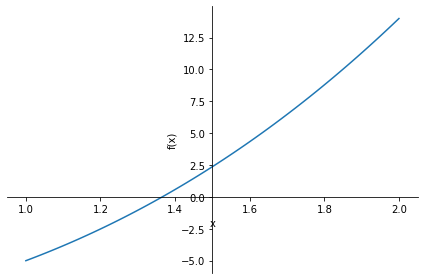

In [160]:
sp.plot(f(x), (x,a,b))

En la gráfica es fácilmente observable como solo ocurre un cambio de signo. Ahora vamos a usar el algoritmo de bisección para obetenr una solución con tres cifras decimales exactas.

In [161]:
biseccion(f,a,b)
a,b = a0,b0
print("La solucion exacta es ", sp.solve(f(x),x)[2].evalf())

Posiblemente solución exacta:  1.365230013414097
Número total de iteraciones  50
La solucion exacta es  1.36523001341410


Ahora vamos a repetir el mismo paso pero buscando 5 cifras decimales exactas y vamos a fijarnos en el número de iteraciones.

Para calcular el numero de iteraciones hacemos:

In [162]:
n = np.log((b-a)/10**(-4))/np.log(2)-1
print("Numero de iteraciones: ", np.ceil(n))

Numero de iteraciones:  13.0


Ahora vamos a utilizar el método de Newton-Raphson con una precisión de $10^-3$. Para ello empezamos calculando la derivada de la función:

In [163]:
def df(x):
    return 3*x**2+8*x

In [164]:
b=1.0
newtonRaphson(f,df,b,4)
print("La solución exacta es ", sp.solve(f(x), x)[2].evalf())

sale el programa por  tolerancia
Aproximación solicitada:  1.365
Número total de iteraciones  4
La solución exacta es  1.36523001341410


**2.- Encuentre una aproximación de la raíz cúbica de 25 con dos decimales exactos (tol =$10^{-2}$), usando el algoritmo de bisección.**

Vamos a definir primero la función que queremos usar:

In [165]:
x = sp.Symbol('x')
a=2
b=3

a0,b0=a,b

def f(x):
    return x**3 - 25

Vamos a ver gráficamente que no nos equivoquemos:

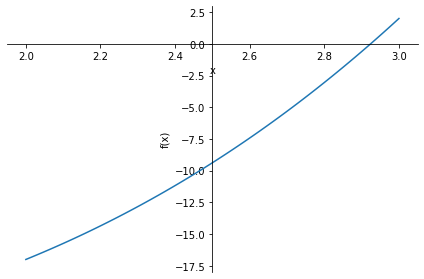

In [166]:
sp.plot(f(x), (x,a,b))

Ahora vamos a aplicar el algoritmo de la bisección, pues se ve claramente un cambio de signo:

In [167]:
biseccion(f,a,b,3)
a,b=a0,b0
print("La solucion de la funcion es ", sp.solve(f(x),x)[0].evalf())

Se llegó al número máximo de iteraciones: 
Número total de iteraciones  100
La solucion de la funcion es  2.92401773821287


**3.- Use el método de Newton-Raphson para aproximar las soluciones de las siguientes ecuaciones con tolerancia $10^{-5}$ , partiendo de un valor adecuado, próximo a cada una de ellas en cada caso.**

**i) $x^3-x-1 = 0$  en $[1,2]$.**

**ii) $3x=2+x^2-e^x$.**

**iii) $x^2+10\, cos x+x=0$.**  

Vamos a empezar definiendo la primera función:

In [168]:
x = sp.Symbol('x')
a=1
b=2

a0,b0=a,b

def f(x):
    return x**3-x-1

In [169]:
def df(x):
    return 3*x**2-1

Y finalmente aplicamos el algoritmo

In [170]:
b=1.2
newtonRaphson(f,df,b,5)
print("La solucion de la funcion es ", sp.solve(f(x),x)[2].evalf())

sale el programa por  tolerancia
Aproximación solicitada:  1.3247
Número total de iteraciones  4
La solucion de la funcion es  1.32471795724475


Ahora simplemente hacemos lo mismo redefiniendo la función

In [171]:
a=0
b=1

def f(x):
    return 2+x**2-3*x-sp.exp(x)

def df(x):
    return 2*x-3-sp.exp(x)

In [172]:
newtonRaphson(f,df,0,5)
print("La solucion de la funcion es ", nsolve(f(x),x,0))

sale el programa por  tolerancia
Aproximación solicitada:  0.257530285439861
Número total de iteraciones  4
La solucion de la funcion es  0.257530285439861


Y una última vez:

In [173]:
def f(x):
    return x**2+10*sp.cos(x)+x

def df(x):
    return 2*x-10*sp.sin(x)+1

In [174]:
print("La primera solucion es ", nsolve(f(x),x,-3))
newtonRaphson(f,df,-3,5)

print("La segunda solución es ", nsolve(f(x), x, -1.5))
newtonRaphson(f,df,-1.5)

La primera solucion es  -3.56233149723641
sale el programa por  tolerancia
Aproximación solicitada:  -3.56233149723641
Número total de iteraciones  6
La segunda solución es  -1.68693989979924
sale el programa por  tolerancia
Aproximación solicitada:  -1.68693989979924
Número total de iteraciones  5


-1.68693989979924

**4.- Para la función  $ f(x)= 3 x^2+e^x-1$,**

**i) Encuentre, mediante el método de bisección una aproximación de la raíz en $[0,1]$ con, al menos, cuatro decimales exactos (tol =$10^{-4}$), y determine el número de iteraciones realizadas;**

**ii) Encuentre, mediante el método de Newton-Raphson, una aproximación de la raíz en $[0,1]$ con una tolerancia de $10^{-4}$, partiendo de $x_0=0$, y determine el número de iteraciones realizadas.** 

Primero como siempre vamos a definir la función y esbozarla:

In [175]:
def f(x):
    return 3*x**2+sp.exp(x)-1

def df(x):
    return 6*x+sp.exp(x)

a,b=0,1

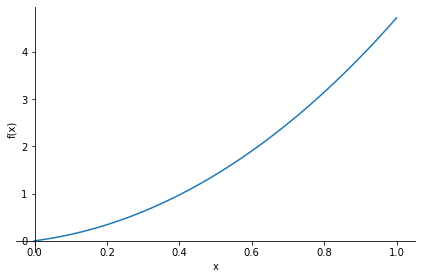

In [176]:
sp.plot(f(x),(x,a,b))

Como la solución exacta es 0, no podemos aplicar el Teorema de Bolzano, así que solo vamos a calcular el número de iteraciones necesarias por el método de bisección.

In [177]:
n = np.log((b-a)/10**(-4))/np.log(2)-1
print("Son necesarias ", np.ceil(n), " iteraciones")

Son necesarias  13.0  iteraciones


Vamos a usar ahora el método de Newton

In [178]:
newtonRaphson(f,df,0.5,4)
print("La solucion de la funcion es ", nsolve(f(x),x,0))

sale el programa por  tolerancia
Aproximación solicitada:  1.48252415799285e-13
Número total de iteraciones  6
La solucion de la funcion es  0


**5.- Utilice las órdenes apropiadas de Python para aproximar todos los puntos donde se anulan las funciones siguientes (si es necesario, represéntelas gráficamente):**

**i) $f(x)=x^7-x^4+2$ ,**

**ii) $f(x)=x^7+\cos  x-3$.**

Primer apartado

In [179]:
def f(x):
    return x**7-x**4+2

def df(x):
    return 6*x**7-4*x**3

a=-2
b=0

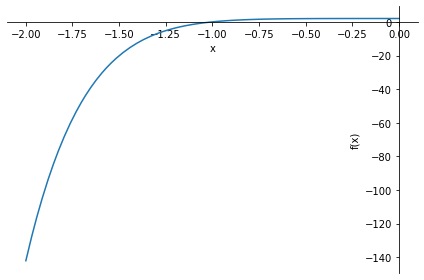

In [180]:
sp.plot(f(x), (x,a,b))

In [181]:
biseccion(f,a,b)
print("La solucion exacta es ", sp.solve(f(x),x)[0].evalf())

Posiblemente solución exacta:  -1
Número total de iteraciones  1
La solucion exacta es  -1.00000000000000


Segundo apartado

In [182]:
def f(x):
    return x**7+sp.cos(x)-3

def df(x):
    return 6*x**7-4*sp.sin(x)

a=1.0
b=1.5

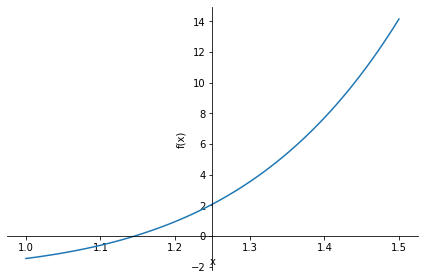

In [183]:
sp.plot(f(x),(x,a,b))

In [184]:
biseccion(f,a,b,5)
print("La solucion exacta es ", sp.nsolve(f(x),x,1))

Se llegó al número máximo de iteraciones: 
Número total de iteraciones  100
La solucion exacta es  1.14545980727001


**6.- Aplicar los métodos de aceleración de la convergencia de Aitken y Steffensen (según los apuntes) a las sucesiones obtenidas para los distintos métodos programados en esta práctica y comparar los resultados. Para aplicar el método de aceleración de Steffensen, recuerde que para transformar cualquier ecuación de la forma  $ f(x)=0 $  en un problema de puntos fijos  $ g(x)=x $, la forma más simple puede ser definir  $g(x)=x \pm f(x)$.**

Empecemos definiedo ambos métodos:

In [185]:
def aitken(sucesion): 
    aceleracion = []
    n = len(sucesion) 
    for k in range(n-2):
        new_aprox = sucesion[k] - (sucesion[k+1]-sucesion[k])**2/(sucesion[k+2]-2*sucesion[k+1]+sucesion[k])
        aceleracion.append(new_aprox) 
    return aceleracion

def steffensen(g,x0,num):
    aprox = [x0,g(x0),g(g(x0))] 
    aceleracion = []
    for k in range(num):
        x0 = aprox[0] - (aprox[1]-aprox[0])**2/(aprox[2]-2*aprox[1]+aprox[0])
        aprox = [x0, g(x0),g(g(x0))]
        aceleracion = aceleracion + [aprox[-1]]
    return aceleracion

Vamos a hacer una modifcicación en los métodos de bisección y de Newton-Raphson para que ahora guarde las iteraciones que va realizando. Vamos a usar la función $$ f(x) = x^3+4x^2-10 $$ usada en el ejercicio 1

Recordemos que por el método de bisección obteníamos los siguientes resultados:

Posiblemente solución exacta:  1.365230013414097

Número total de iteraciones  50

La solucion exacta es  1.36523001341410

In [186]:
def f(x):
    return x**3+4*x**2-10

a,b=1,2
a0,b0=a,b

In [187]:
cifras = 6 # Número de cifras con el que queremos calcular prec = 10**(-cifras)
getcontext().prec = cifras
tol = 10**(-cifras+1)
nmax = 100
niter = 0
prec=10**(-16)
iteraciones = []
for k in range(nmax):
    niter = niter + 1;
    c = a + (b-a)/2 # equivalente a c = (a+b)/2 
    iteraciones.append(c)
    if abs(f(c)) < prec:
        sale = 'precision'
        break
    if np.sign(f(a)) != np.sign(f(c)):
        b=c
    else:
        a=c
    if b-a < tol:
        sale = 'tolerancia' 
        break

Ahora ya disponemos de una lista con las distintas iteraciones así que aplicamos los métodos de aceleración:

In [188]:
acel_aitken = aitken(iteraciones) 
n = len(acel_aitken)
print("Con el método de Aitken: ", n, acel_aitken[n-1])

Con el método de Aitken:  15 1.365234375


Hay que recordar que para el método de Steffensen utilizábamos una función de la forma $$ g(x)=x-f(x) $$

In [189]:
x0 = 1 

def g(x):
    return x-f(x)

acel_stef = steffensen(g,x0,10)
print("Con el método de Steffensen: ", len(acel_stef), acel_stef[len(acel_stef)-1])

Con el método de Steffensen:  10 1.3652300134140969


Vamos a hacer lo mismo para el método de Newton-Raphson. Recordemos que obteníamos:

Aproximación solicitada:  1.365

Número total de iteraciones  4

La solución exacta es  1.36523001341410

In [190]:
a,b=a0,b0

def df(x):
    return 3*x**2 + 8*x

mporig = getcontext().prec 
iteraciones = []
x0 = Decimal(a); niter = 0; sale ='' 
cifras = 4
for k in range(nmax):
    niter = niter + 1;
    x1 = x0 - f(x0)/Decimal(df(x0)) 
    iteraciones.append(x0)
    if abs(x1-x0) < tol:
        sale = 'tolerancia'
        break
    if abs(f(x1)) < prec:
        sale = 'precision'
        break 
    else:
        x0 = x1

Vamos a usar ahora los métodos de aceleración:

In [191]:
acel_aitken = aitken(iteraciones) 
n = len(acel_aitken)
print("Con el método de Aitken: ", n, acel_aitken[n-1])

Con el método de Aitken:  2 1.36508


In [192]:
x0 = 1 
def g(x):
    return x-f(x)

acel_stef = steffensen(g,x0,10) 
print("Con Steffensen: ", len(acel_stef), acel_stef[len(acel_stef)-1])

Con Steffensen:  10 1.3652300134140969


**7.- Programar el método de Newton-Raphson acelerado, partiendo de cierto $x_0$ adecuado: $$x_{n+1}=x_n - m\frac{f(x_n)}{f'(x_n)}, \quad n=0,1,2,\ldots$$ para el caso de una raíz múltiple (de multiplicidad $m\in\mathbb{N}$) de una ecuación del tipo $f(x)=0$ y comparar los resultados con los que se obtienen mediante el empleo de los métodos de aceleración habituales de Aitken y Steffensen (según los apuntes).**

Primero vamos a definir un polinomio con varias raíces de distintas multiplicidades:

In [193]:
def f(x):
    return x*(x-1)**3

Va a ser necesaria su versión en decimal y su derivada:

In [194]:
def f_dec(x):
    return x*(x-Decimal(1))**3

def df(x):
    return (x-Decimal(1))**3+x*Decimal(3)*(x-Decimal(1))**2

Con esto ya creamos el algoritmo de Newton-Raphson acelerado:

In [195]:
def NR_acelerado(f,df,b,m,cifras=16,prec=10**(-16)): 
    getcontext().prec = cifras
    tol = 10**(-cifras+1)
    iteraciones = []
    x0 = Decimal(b); niter = 0; sale ='' 
    for k in range(nmax):
        niter = niter + 1;
        x1 = x0 - m*f(x0)/df(x0) 
        iteraciones.append(float(x1)) 
        if abs(x1-x0) < tol:
            sale = 'tolerancia'
            break
        if abs(f(x1)) < prec:
            sale = 'precision'
            break 
        else:
            x0 = x1

    print('sale el programa por ',sale) 
    if sale == 'precision':
        print('Posiblemente solución exacta: ',x1) 
    elif niter < nmax:
        print('Aproximación solicitada: ', x1) 
    else:
        print('Se llegó al número máximo de iteraciones') 

    print("Numero de iteraciones realizadas: ", niter)

    getcontext().prec = mporig
    return iteraciones

Vamos a aplicarlo a la función antes definida

In [196]:
aprox1, aprox2 = -0.5,1.5
m1,m2 = 1,3
iter1 = NR_acelerado(f_dec,df,aprox1,m1)
print("") 
iter2 = NR_acelerado(f_dec,df,aprox2,m2) 

sale el programa por  precision
Posiblemente solución exacta:  -2.61282E-21
Numero de iteraciones realizadas:  7

sale el programa por  precision
Posiblemente solución exacta:  1.000000203238814
Numero de iteraciones realizadas:  3


Vamos a mirar ahora los métodos de Aitken y Steffensen para la última raíz:

In [197]:
aitken2 = aitken(iter2)
print ("Con Aitken: ", len(aitken2), aitken2[len(aitken2)-1])

Con Aitken:  1 0.9999876090404444


In [198]:
def g(x):
    return x-f(x)

x0 = 1.5
steffensen2 = steffensen(g,x0,15) 
print("Con Steffensen: ", len(steffensen2), steffensen2[len(steffensen2)-1])

Con Steffensen:  15 1.0009202086965279
